In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as pd
from pygem_eb.processing.plotting_fxns import *
from objectives import *
data_fp = '/home/claire/research/MB_data/Gulkana/Input_Gulkana_Glaciological_Data.csv'

Compare snow density

0     -0.05
1     39.95
2     79.95
3    119.95
4    159.95
5    199.95
6    239.95
7    264.95
8    289.95
9       NaN
Name: sample_depth, dtype: float64
0     -0.05
1     39.95
2     79.95
3    119.95
4    159.95
5    199.95
6    239.95
7    279.95
8    319.95
9    354.95
Name: sample_depth, dtype: float64
0     -0.05
1     39.95
2     82.95
3    102.95
4    103.95
5    149.95
6    189.95
7       NaN
Name: sample_depth, dtype: float64
0     -0.05
1     39.95
2     79.95
3    119.95
4    159.95
5    199.95
6    244.95
7    289.95
8    329.95
Name: sample_depth, dtype: float64
0     -0.05
1     39.95
2     79.95
3    119.95
4    149.95
5    182.95
6       NaN
Name: sample_depth, dtype: float64
0     -0.05
1     39.95
2     79.95
3    119.95
4    159.95
5    199.95
6    239.95
7    284.95
8    328.95
Name: sample_depth, dtype: float64
0     -0.05
1     39.95
2     79.95
3    119.95
4    159.95
5    199.95
6    239.95
7    269.95
8    294.95
Name: sample_depth, dtype: float64
0     39.95

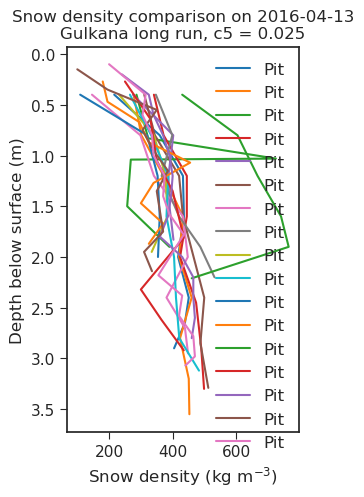

10     208.776779
30     228.751655
50     277.267207
70     318.288106
90     355.144486
110    367.603887
130    374.370542
150    382.463459
170    397.222423
190    399.264239
210    387.822141
230    384.778456
250    390.747433
270    395.654773
290    399.666852
310    402.776698
330    404.528640
dtype: float64


In [10]:
id = 8
import os
# ds,startdate,enddate = getds(f'../Output/EB/Gulkana_2024_10_17_{id}.nc')
depths = np.arange(10,360,20)
all = pd.DataFrame(np.zeros(len(depths)),index=depths)
fps = os.listdir('../MB_data/Point/gulkana/pitcore/')
fig,ax = plt.subplots(figsize=(3,5))
for year in np.arange(2000,2017):
    
    for fp in fps:
        if str(year) in fp and '_B' in fp:
            if '04' in fp or '05' in fp:
                fp_read = fp
    if str(year) not in fp_read:
        print('skipping',year)
        continue
    df = pd.read_csv(f'../MB_data/Point/gulkana/pitcore/'+fp_read)
    df['density'] = df['sample_weight'] / df['volume'] * 1000
    df['sample_depth'] = df['sample_bottom_depth'] - 0.05
    density_interp = np.interp(depths,df['sample_depth'].values,df['density'].values)
    all[f'density_{year}'] = density_interp
    sample_date = fp_read[8:18].replace('_','-')
    ax.plot(df['density'], df['sample_bottom_depth'] /100 ,label='Pit')
    # profile = ds.sel(time=pd.to_datetime(f'{sample_date} 14:00'))
    # snow_idx = np.where(profile['layerdensity'] < 800)[0]
    # snow_density = profile.isel(layer=snow_idx).layerdensity.values
    # snow_heights = profile.isel(layer=snow_idx).layerheight.values
    # snow_depths = np.array([np.sum(snow_heights[:i+1])-(snow_heights[i]/2) for i in range(len(snow_heights))])
    # ax.plot(snow_density,snow_depths,label='Model')
    ax.invert_yaxis()
    ax.legend(fontsize=12)
    ax.tick_params(length=5,labelsize=11)
    ax.set_ylabel('Depth below surface (m)',fontsize=12)
    ax.set_xlabel('Snow density (kg m$^{-3}$)',fontsize=12)
plt.title(f'Snow density comparison on {sample_date}\nGulkana long run, c5 = 0.025')
plt.show()
result = pd.DataFrame(all.mean(axis=1))
print(all.mean(axis=1))

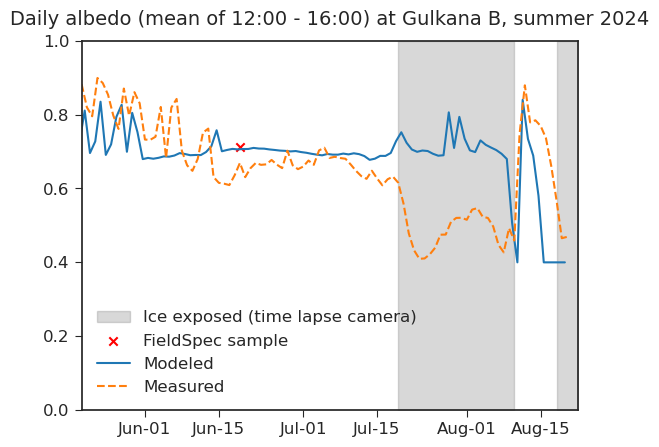

In [30]:
df = pd.read_csv('/home/claire/research/climate_data/AWS/Preprocessed/CLAWS_2024.csv',index_col=0)
df.index = pd.to_datetime(df.index) # - pd.Timedelta(hours=8)
# df['albedo'] = df['SWout'] / df['SWin']
daily_albedo = []
dates = pd.date_range('2024-05-20','2024-08-22',freq='d')
for date in dates:
    start = pd.to_datetime(str(date.date())+' 12:00')
    end = pd.to_datetime(str(date.date())+' 16:00')
    # print(df.loc[start:end,'albedo'].values)
    daily_albedo.append(np.mean(df.loc[start:end,'albedo']))
y = np.arange(0,1.1,0.1)
fig,ax = plt.subplots()
ax.fill_betweenx(y,[pd.to_datetime('2024-08-10')],[pd.to_datetime('2024-07-19')],color='grey',alpha=0.3,label='Ice exposed (time lapse camera)')
ax.fill_betweenx(y,[pd.to_datetime('2024-08-18')],[pd.to_datetime('2024-08-22')],color='grey',alpha=0.3)
ax.scatter(pd.to_datetime('2024-06-19'),0.7123,marker='x',color='red',label='FieldSpec sample')
ax.set_xlim(dates[0],dates[-1])
ax.set_ylim(0,1)
ax.tick_params(labelsize=12)

ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%b-%d'))
ax.set_title('Daily albedo (mean of 12:00 - 16:00) at Gulkana B, summer 2024',fontsize=14,y=1.02)
plt.tick_params(size=5)
dsp = ds.sel(time=pd.date_range('2024-04-20 14:00','2024-08-19 14:00'))
ax.plot(dsp.time,dsp['albedo'],label='Modeled')
ax.plot(dates,daily_albedo,label='Measured',linestyle='--')
# plt.savefig('/home/claire/research/climate_data/AWS/gulkana_albedo_2024.png',dpi=150,bbox_inches='tight')
ax.legend(fontsize=12)
plt.show()

Removing variables and compare dh resutl

In [15]:
# store = {}
# site='B'
# fp = '/home/claire/research/MB_data/Stakes/gulkanaB24_GNSSIR.csv'
# store['base'],_,_ = getds('../Output/EB/base_0.nc')
# fig,ax = cumulative_mass_balance(fp,store['base'],plot=True)
# fig.suptitle(f'Site B forced with all AWS data')
# model_melt = -store['base'].melt.sum().values + store['base'].accum.sum().values + store['base'].refreeze.sum().values
# df_stakes = pd.read_csv('../MB_data/Gulkana/Input_Gulkana_Glaciological_Data.csv',index_col=0)
# stake_melt = df_stakes.loc[df_stakes['site_name'] == site].loc[2024]
# stake_melt = stake_melt['ba'] - stake_melt['bw']
# ax.set_title(f'Modeled summer MB: {model_melt:.2f}\nMeasured summer MB: {stake_melt:.2f}')
# for var in ['SWin','LWin','rh','sp','temp','wind']:
#     store['no'+var],_,_ = getds(f'../Output/EB/no{var}_0.nc')
#     fig,ax = cumulative_mass_balance(fp,store['no'+var],plot=True)
#     ax.set_title(f'Replaced AWS {var} with MERRA-2')

In [16]:
# id = 2
# for site in ['AB','B','D','T']:
#     ds,startdate,enddate = getds(f'../Output/EB/Gulkana_2024_10_17_{site}_{id}.nc')
#     fp = f'/home/claire/research/MB_data/Stakes/gulkana{site}24_GNSSIR.csv'
#     if site != 'T':
#         fig,ax = seasonal_mass_balance(data_fp,ds,site,plot=True)
#         fig.suptitle(f'MERRA-2 inputs: site {site}',y=1.05)
#         # plt.show()
#         plt.savefig(f'../Output/EB/10_17/longrun_{site}_mb.png',dpi=200,bbox_inches='tight')
#     if site != 'D':
#         fig,ax = cumulative_mass_balance(fp,ds,plot=True)
#         fig.suptitle(f'Site {site} long run',y=0.98)
#         spring_date = df_stakes.loc[df_stakes['site_name'] == site].loc[2024,'spring_date']
#         spring_date = max(pd.to_datetime(spring_date),pd.to_datetime('2024-04-20'))
#         fall_date = df_stakes.loc[df_stakes['site_name'] == site].loc[2024,'fall_date']
#         fall_date = min(pd.to_datetime(fall_date),pd.to_datetime('2024-08-20'))
#         ds = ds.sel(time=pd.date_range(spring_date,fall_date,freq='h'))
#         cmb = ds.accum + ds.refreeze - ds.melt
#         model_melt = cmb.sum().values
#         df_stakes = pd.read_csv(data_fp,index_col=0)
#         stake_melt = df_stakes.loc[df_stakes['site_name'] == site].loc[2024]
#         stake_melt = stake_melt['ba'] - stake_melt['bw']
#         ax.set_title(f'Modeled summer MB: {model_melt:.2f}\nMeasured summer MB: {stake_melt:.2f}')
#         # plt.show()
#         plt.savefig(f'../Output/EB/10_17/longrun_{site}_dh.png',dpi=200,bbox_inches='tight')

In [29]:
site = 'B'
id = 7
ds = xr.open_dataset(f'../Output/EB/Gulkana_2024_10_21_{site}_{id}.nc')
fp_snow = f'../Data/iButton/iButtons_2024_{site}.csv'
# df = pd.read_csv(fp_snow,index_col=0)
# for col in df.columns:
#     df = df.rename(columns={col:col.split('_')[1]})
# df.to_csv(fp_snow)
# snow_temperature(fp_snow,ds,'MAE',plot=True,plot_heights=[0,1,2.5])

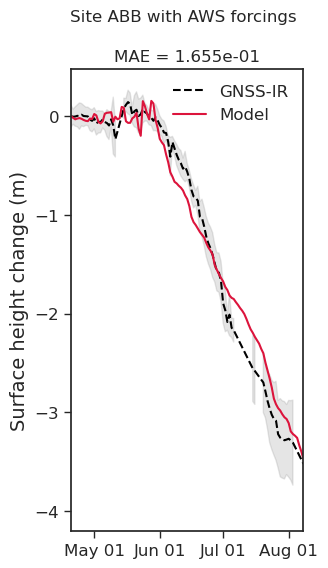

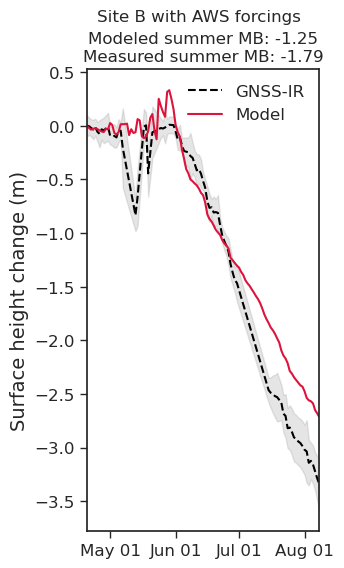

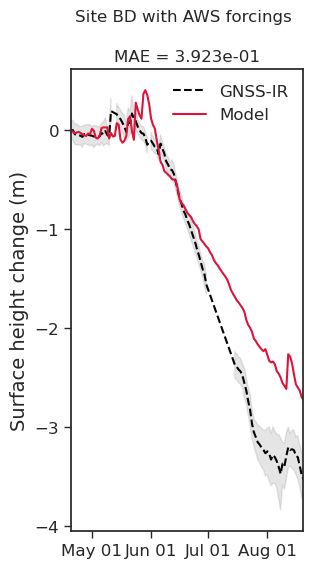

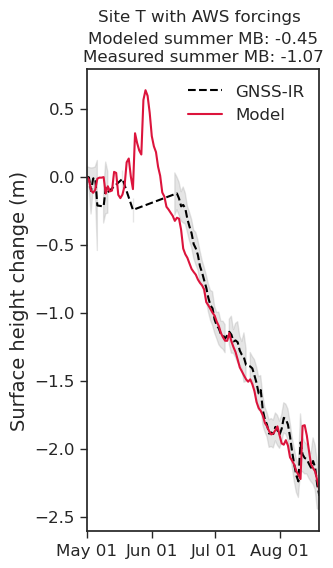

In [45]:
id = 5
for site in ['ABB','B','BD','T']:
# for site in ['B']:
    ds,startdate,enddate = getds(f'../Output/EB/Gulkana_2024_10_21_{site}_{id}.nc')
    fp = f'/home/claire/research/MB_data/Stakes/gulkana{site}24_GNSSIR.csv'
    fig,ax = cumulative_mass_balance(fp,ds,plot=True)
    fig.suptitle(f'Site {site} with AWS forcings',y=0.98)
    
    if site not in ['ABB','BD']:
        df_stakes = pd.read_csv('../MB_data/Gulkana/Input_Gulkana_Glaciological_Data.csv',index_col=0)
        stake_melt = df_stakes.loc[df_stakes['site_name'] == site].loc[2024]
        spring_date = df_stakes.loc[df_stakes['site_name'] == site].loc[2024,'spring_date']
        spring_date = max(pd.to_datetime(spring_date),pd.to_datetime('2024-04-20'))
        fall_date = df_stakes.loc[df_stakes['site_name'] == site].loc[2024,'fall_date']
        fall_date = min(pd.to_datetime(fall_date),pd.to_datetime('2024-08-19'))
        ds = ds.sel(time=pd.date_range(spring_date,fall_date,freq='h'))
        stake_melt = stake_melt['ba'] - stake_melt['bw']
        model_cmb = ds.accum + ds.refreeze - ds.melt
        model_melt = model_cmb.sum().values
        ax.set_title(f'Modeled summer MB: {model_melt:.2f}\nMeasured summer MB: {stake_melt:.2f}')
    # plt.show()
    plt.savefig(f'/home/claire/research/Output/EB/gulkana{site}_10_21.png',dpi=180,bbox_inches='tight')

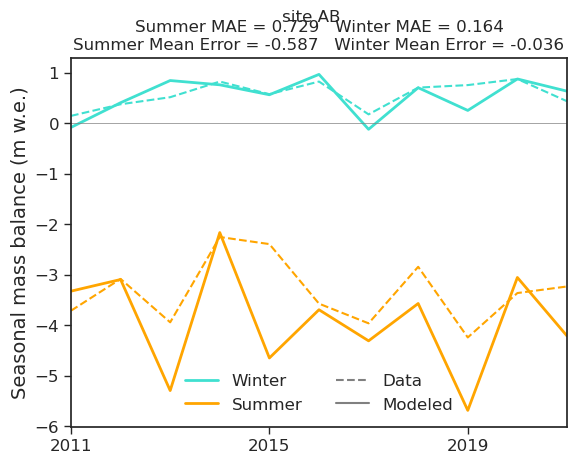

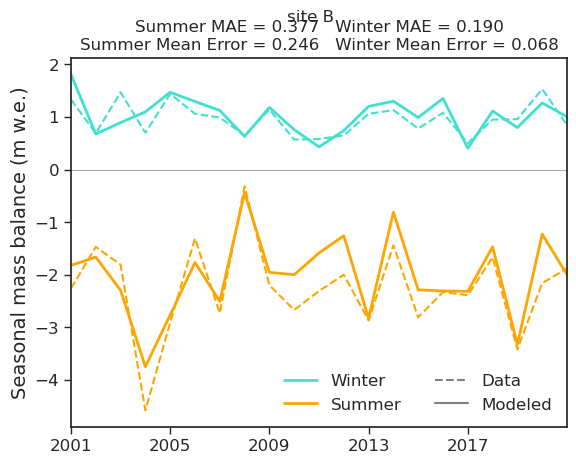

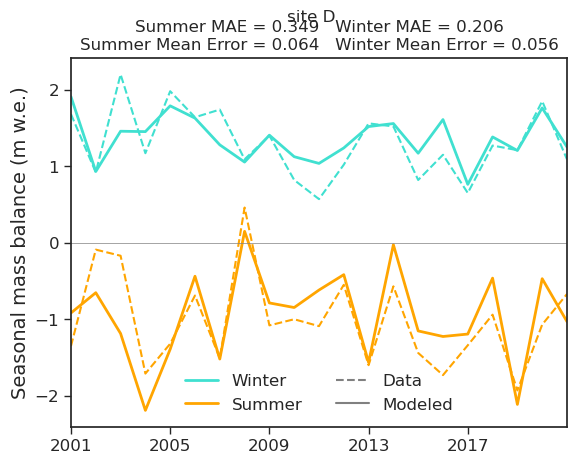

In [36]:
id =0
for site in ['AB','B','D']:
# for site in ['B']:
    ds,startdate,enddate = getds(f'../Output/EB/Gulkana_2024_10_21_{site}_{id}.nc')
    fig,ax = seasonal_mass_balance(data_fp,ds,site=site,plot=True)
    fig.suptitle(f'site {site}')

In [2]:
# FIND BEST RUN IN A SET
date = '10_18'
path_out = f'/home/claire/research/Output/calibration/{date}_0/'
sites= ['AB','B','D']
# fn = f'kw{kw}_ksnow{k_snow}_aice{a_ice}_site{site}_0.nc'
dsdict = {'AB':[],'B':[],'D':[]}
outdict = {'AB':[],'B':[],'D':[]}
for i in range(85):
    fn = f'calibration_{date}_run{i}_0.nc'
    try:
        ds,startdate,enddate = getds(path_out+fn)
    except:
        print(fn,'doesnt exist')
        continue
    site = ds.attrs['site']
    winter,summer = seasonal_mass_balance(data_fp,ds,site)
    dsdict[site].append(ds)
    # if i % 5 == 0:
    #     print(ds.attrs[param])
    # outdict[site].append(np.mean([winter,summer]))
    outdict[site].append(summer)
    # print(ds.attrs['k_snow'],winter,summer,np.mean([winter,summer]))
best = {}
for site in sites:
    best[site] = dsdict[site][np.argmin(outdict[site])]
    print(site,np.argmin(outdict[site]))
    # simple_plot(ds,['2004-04-20','2004-10-20'],[['albedo']],res='d')

AB 27
B 25
D 23


In [6]:
result_df = pd.DataFrame(data=np.zeros((len(sites),3)),columns=sites,index=['kp','kw','a_ice'])
for site in sites:
    ds = best[site]
    result_df.loc['kp',site] = float(ds.attrs['kp'])
    if site == 'D':
        result_df.loc['kw',site] = 2 #float(ds.attrs['kw'])
        result_df.loc['a_ice',site] = 0.4
    else:
        result_df.loc['a_ice',site] = float(ds.attrs['a_ice'])
        result_df.loc['kw',site] = 3
# result_df.to_csv(f'/home/claire/research/Gulkana_params_{date}_HIGHWIND.csv',sep=',')
print(result_df)

         AB    B    D
kp     3.20  3.2  3.2
kw     3.00  3.0  2.0
a_ice  0.25  0.4  0.4


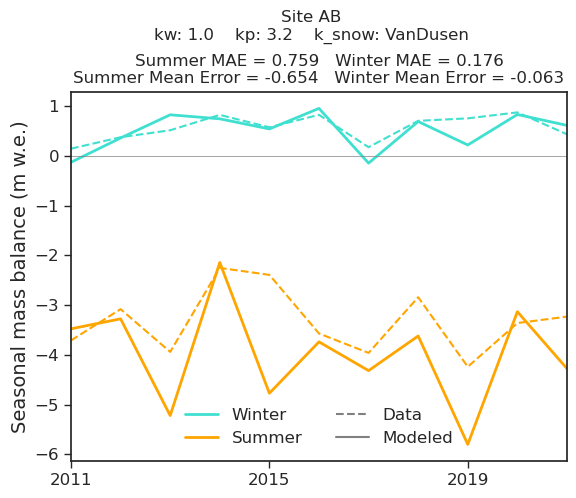

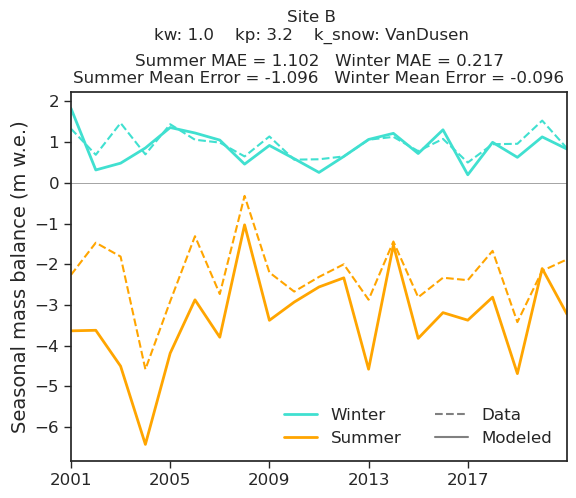

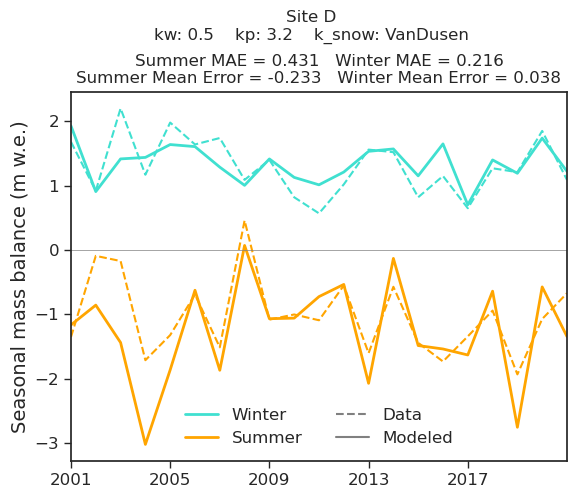

In [3]:
for site in sites:
    # ds = best[site]
    ds = dsdict[site][-1]
    # ds = xr.open_dataset(f'/home/claire/research/Output/EB/Gulkana_10_09_paramset_{site}_0.nc')
    param = 'kw' #if site == 'D' else 'a_ice'
    k_snow = ds.attrs['k_snow']
    kw = ds.attrs['kw']
    a_ice = ds.attrs['a_ice']
    kp = ds.attrs['kp']
    # kp = result_df.loc['kp',site]
    # kw = result_df.loc['kw',site]
    # a_ice = result_df.loc['a_ice',site]
    param_value = kw if param == 'kw' else a_ice # float(ds.attrs[param])
    fig,ax = seasonal_mass_balance(data_fp,ds,site,plot=True)
    fig.suptitle(f'Site {site}\n{param}: {param_value}    kp: {kp}    k_snow: {k_snow}',y=1.05)
    # plt.savefig(f'/home/claire/research/Output/calibration/{date}_paramsMERRA2_{site}.png',dpi=200,bbox_inches='tight')

In [11]:
var = 'wind'
ds_AWS = xr.open_dataset('/home/claire/research/Output/EB/Gulkana_2024_10_08_1_climate.nc')
ds_MERRA2 = xr.open_dataset('/home/claire/research/Output/EB/Gulkana_2024_10_08_0_climate.nc')
ds3 =  xr.open_dataset('/home/claire/research/Output/EB/Gulkana_2024_10_08_climate.nc')
# ds4 = ds3['temp'] *m+b
ds_AWS = ds_AWS[var].resample(time='MS').mean()
ds_MERRA2 = ds_MERRA2[var].resample(time='MS').mean()
ds3 = ds3[var].resample(time='MS').mean()
# ds4 = ds4.resample(time='MS').mean()

fig,axes = plt.subplots(1,2,figsize=(8,2.5),width_ratios=(2,1),gridspec_kw={'wspace':0.35})
axes[1].scatter(ds_AWS.values,ds3.values,color='red')
axes[1].set_ylabel('MERRA-2',fontsize=12)
axes[1].set_xlabel('AWS',fontsize=12)
valmin = np.min([ds_AWS.values,ds3.values])
# valmax = np.max([ds_AWS.values,ds3.values])
valmax = 7
axes[1].plot([valmin,valmax],[valmin,valmax],'k--')
axes[1].set_ylim(valmin,valmax)
axes[1].set_xlim(valmin,valmax)

# axes[2].scatter(ds_AWS.values,ds_MERRA2.values,label='MERRA-2',color='red')
# axes[2].set_ylabel('MERRA-2, Corrected',fontsize=12)
# axes[2].set_xlabel('AWS',fontsize=12)
# valmin = np.min([ds_AWS.values,ds_MERRA2.values])
# valmax = np.max([ds_AWS.values,ds_MERRA2.values])
# axes[2].plot([valmin,valmax],[valmin,valmax],'k--')
axes[1].set_ylim(1,6)
axes[1].set_xlim(1,6)
axes[1].set_xticks(np.arange(1,7))
axes[1].set_yticks(np.arange(1,7))
ax = axes[0]
dtfm = mpl.dates.DateFormatter('%Y')
ax.plot(ds_AWS.time,ds_AWS.values,label='AWS',color=mpl.cm.tab10(1))
ax.plot(ds3.time,ds3.values,label='MERRA-2',color=mpl.cm.tab10(2),linestyle=':')
# ax.plot(ds_MERRA2.time,ds4.values,label='MERRA-2 (corrected)',color=mpl.cm.tab10(0))
ax.set_ylim(1,6)
ax.set_yticks(np.arange(1,7))
ax.set_ylabel('Air temperature ($^{\circ}$C)',fontsize=12)
start = pd.to_datetime('2009-12-31 00:00')
# ax.set_ylabel('Wind speed (m/s)',fontsize=12)
end = pd.to_datetime('2020-01-01')
ax.set_xlim(start,end)
ax.xaxis.set_major_formatter(dtfm)
ax.set_xticks(pd.date_range(start,end,freq='24MS'))
ax.legend(facecolor='white',edgecolor='none',loc='upper left')
for ax in axes:
    ax.tick_params(length=5)
# plt.show()
plt.savefig('/home/claire/research/climate_data/MERRA2_AWS_NEWWIND.png',bbox_inches='tight',dpi=250)

0.7280142198171007 2.2339880865065864


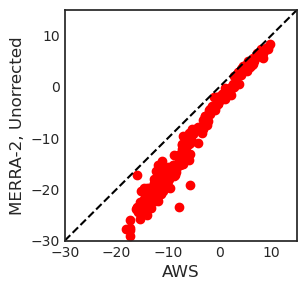

In [4]:
threshold = 15
aws = ds_AWS.values[ds3.values < threshold]
merra = ds3.values[ds3.values < threshold]

# m,_,_,_ = np.linalg.lstsq(merra[:, np.newaxis],aws,rcond=None)
# b = [0]
m,b = np.polyfit(merra,aws,1)
plt.figure(figsize=(3,3))
plt.scatter(ds_AWS.values,ds3.values,color='red')
plt.xlabel('AWS',fontsize=12)
plt.ylabel('MERRA-2, Unorrected',fontsize=12)
# plt.scatter(aws,merra*m+b,color='red')
# plt.scatter(ds_AWS.values[ds3.values >= threshold],ds3.values[ds3.values >= threshold],color='red')
minx = -30
maxx = 20 #np.max(merra)
# plt.plot([minx,maxx],[minx*m[0]+b[0],maxx*m[0]+b[0]],'k')
plt.plot([minx,maxx],[minx,maxx],'k--')
plt.xlim(-30,15)
plt.ylim(-30,15)
# plt.show()
plt.savefig('/home/claire/research/climate_data/uncorrected_temp.png',dpi=200,bbox_inches='tight')
print(m,b)

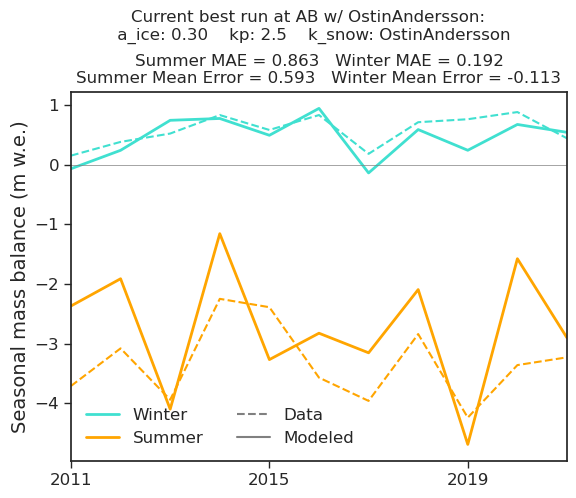

In [45]:
k_snow = ds.attrs['k_snow']
kw = ds.attrs['kw']
a_ice = ds.attrs['a_ice']
kp = ds.attrs['kp']
param_value = float(ds.attrs[param])
fig,ax = seasonal_mass_balance(data_fp,ds,site,plot=True)
fig.suptitle(f'Current best run at {site}: \n {param}: {param_value:.2f}    kp: {kp}    k_snow: {k_snow}',y=1.05)
# plt.show()
# plt.savefig(f'/home/claire/research/Output/calibration/10_05_0/best_{site}.png',dpi=200,bbox_inches='tight')

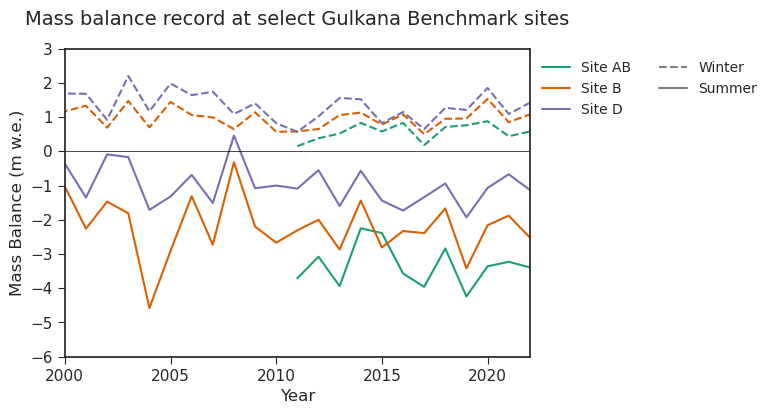

In [42]:
df = pd.read_csv(data_fp)
df['bs'] = df['ba'] - df['bw']
colors = mpl.cm.Dark2
plt.figure(figsize=(6,4))
for i,site in enumerate(['AB','B','D']):
    c = colors(i)
    site_df = df[df['site_name'] == site]
    plt.plot(site_df['Year'],site_df['bw'],linestyle='--',color=c)
    plt.plot(site_df['Year'],site_df['bs'],color=c,label=f'Site {site}')
plt.plot(np.nan,np.nan,linestyle='--',color='gray',label='Winter')
plt.plot(np.nan,np.nan,color='gray',label='Summer')
plt.axhline(0,color='black',linewidth=0.5)
plt.legend(ncols=2,bbox_to_anchor=(1,1))
plt.xlim(2000,2022)
plt.ylim(-6,3)
plt.xticks(np.arange(2000,2023,5))
plt.tick_params(size=5,labelsize=11)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Mass Balance (m w.e.)',fontsize=12)
plt.title('Mass balance record at select Gulkana Benchmark sites',fontsize=14,y=1.05)
plt.savefig('/home/claire/research/MB_data/three_sites_legend.png',dpi=300,bbox_inches='tight')

In [234]:
path_out = '/home/claire/research/Output/calibration/09_24/'

# Parameter sets
aa = [0.2,0.4,0.6]
ww = [0.25,0.5,0.75,1]
kk = ['Sturm','Douville','Jansson'] #,'OstinAndersson','VanDusen']
params_dict = {'kw':ww,'k_snow':kk,'a_ice':aa} # 'kw':ww,

# Get the lengths of each parameter list for the result array shape
shape = [len(v) for v in params_dict.values()]

# Initialize result arrays with a dimension for site (3 sites + 1 for the average)
winter_result = np.ones([4] + shape)
summer_result = np.ones([4] + shape)

# Initialize lists for storing the parameters
params_list = {key: [] for key in params_dict}

# Generate combinations of all parameters
all_combos = itertools.product(*params_dict.values())
for idx, param_values in enumerate(all_combos):
    # Unpack indices
    indices = np.unravel_index(idx, shape)

    # Store parameter set
    for param_name, param_value in zip(params_dict.keys(), param_values):
        params_list[param_name].append(param_value)
    
    # Iterate over sites
    for s, site in enumerate(['AB', 'B', 'D']):
        kw = 0.25 if site == 'D' else 1
        fn = f'kw{kw}_'

        # fn = ''
        for param_name, param_value in zip(params_dict.keys(), param_values):
            fn += param_name.replace('_','')+str(param_value)+'_'
        fn += f'site{site}_0.nc'

        try:
            ds, startdate, enddate = getds(path_out + fn)
            winter, summer = seasonal_mass_balance(data_fp, ds, site=site, method='MAE')
        except:
            winter, summer = (np.nan, np.nan)
            print(fn + ' does not exist')
        
        # Store results in the corresponding array
        winter_result[s][indices] = winter
        summer_result[s][indices] = summer

    # Compute site averages and store in the last index (3rd index in the result arrays)
    winter_result[3][indices] = np.mean(winter_result[:3,*indices])
    summer_result[3][indices] = np.mean(summer_result[:3,*indices])

In [235]:
best = {'winter': {key: [] for key in params_dict}, 
        'summer': {key: [] for key in params_dict}}

if summer_result.shape == (4,4,3,3):
    print('When including kw as a parameter:')
elif summer_result.shape == (4,3,3):
    print('When setting kw = 0.25 at site D, 1 elsewhere:')
for site in ['mean','AB','B','D','mean']:
    idx = np.where(np.array(['AB','B','D','mean']) == site)[0]
    best_winter = np.argmin(winter_result[idx])
    best_summer = np.argmin(summer_result[idx])
    for key in params_dict:
        best['winter'][key] = params_list[key][best_winter]
        best['summer'][key] = params_list[key][best_summer]
    if site == 'mean':
        print('Best winter parameter set overall:',best['winter'])
        print('Best summer parameter set overall:',best['summer'])
        print()
    else:
        print(f'Best winter parameter set at site {site}:',best['winter'])
        print(f'Best summer parameter set at site {site}:',best['summer'])

When setting kw = 0.25 at site D, 1 elsewhere:
Best winter parameter set overall: {'k_snow': 'Sturm', 'a_ice': 0.6}
Best summer parameter set overall: {'k_snow': 'Jansson', 'a_ice': 0.6}

Best winter parameter set at site AB: {'k_snow': 'Jansson', 'a_ice': 0.4}
Best summer parameter set at site AB: {'k_snow': 'Jansson', 'a_ice': 0.2}
Best winter parameter set at site B: {'k_snow': 'Sturm', 'a_ice': 0.6}
Best summer parameter set at site B: {'k_snow': 'Jansson', 'a_ice': 0.6}
Best winter parameter set at site D: {'k_snow': 'Sturm', 'a_ice': 0.6}
Best summer parameter set at site D: {'k_snow': 'Sturm', 'a_ice': 0.2}
Best winter parameter set overall: {'k_snow': 'Sturm', 'a_ice': 0.6}
Best summer parameter set overall: {'k_snow': 'Jansson', 'a_ice': 0.6}



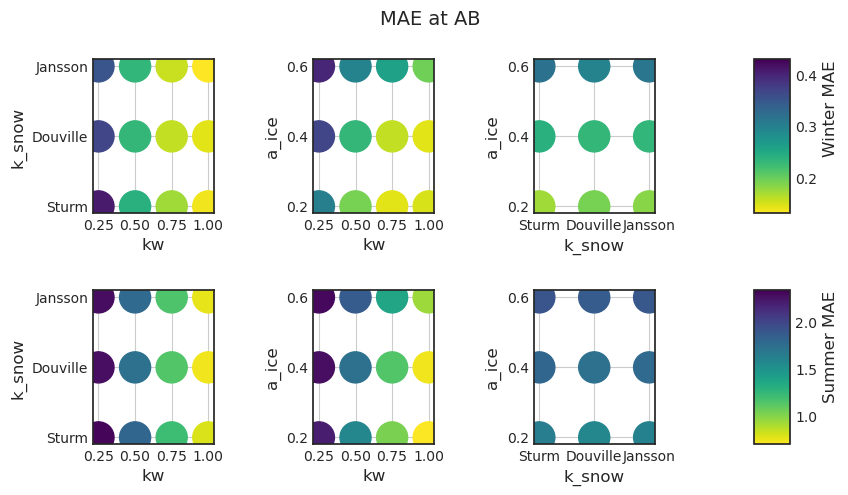

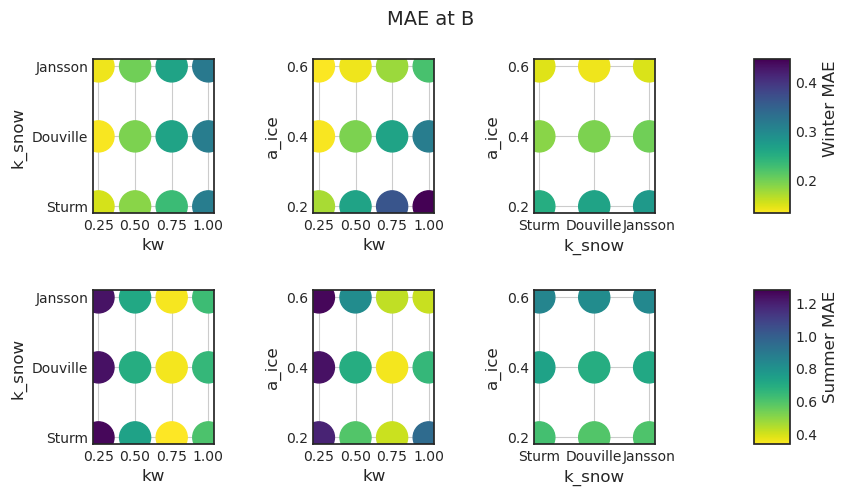

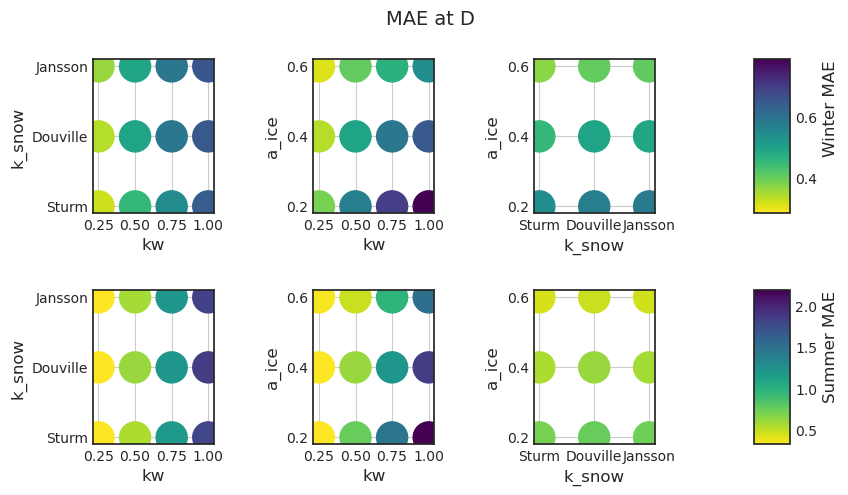

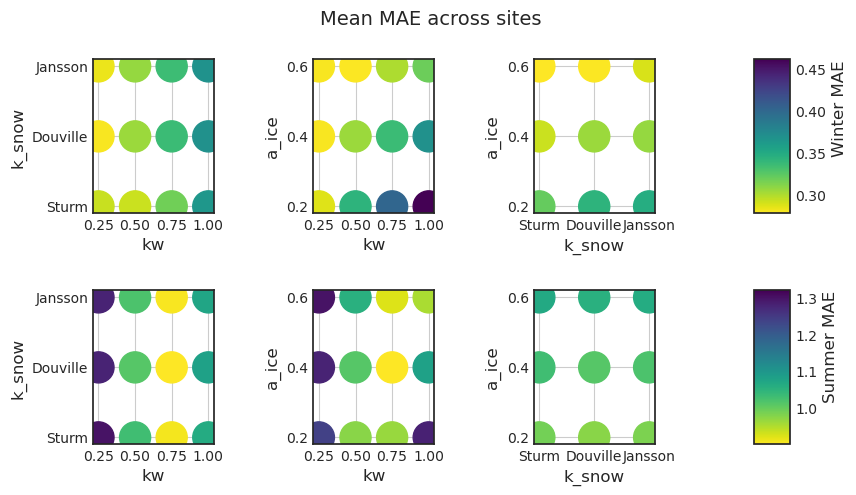

In [243]:
for site in ['AB','B','D','mean']:
    idx = np.where(np.array(['AB','B','D','mean']) == site)[0][0]
    fig, axes = grid_plot(params_dict,summer_result[idx],winter_result[idx])
    if site == 'mean':
        title_first = f'Mean MAE across sites'
    else:
        title_first = f'MAE at {site}'
    if summer_result.shape == (4,4,3,3):
        fig.suptitle(title_first,fontsize=14)
        plt.savefig(f'/home/claire/research/Output/Figs/grid_plot_{site}.png',dpi=200,bbox_inches='tight')
    elif summer_result.shape == (4,3,3):
        fig.suptitle(f'{title_first}\nWith kw=0.25 at D and 1 elsewhere',fontsize=14)
        plt.savefig(f'/home/claire/research/Output/Figs/grid_plot_{site}_nokw.png',dpi=200,bbox_inches='tight')

Must index dates exactly 1 year - 1 day apart
0.8826196077192149


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Summer accumulation and winter ablation at site B'}, ylabel='Partitioned seasonal mass balance (m w.e.)'>)

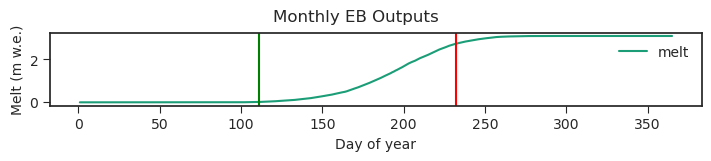

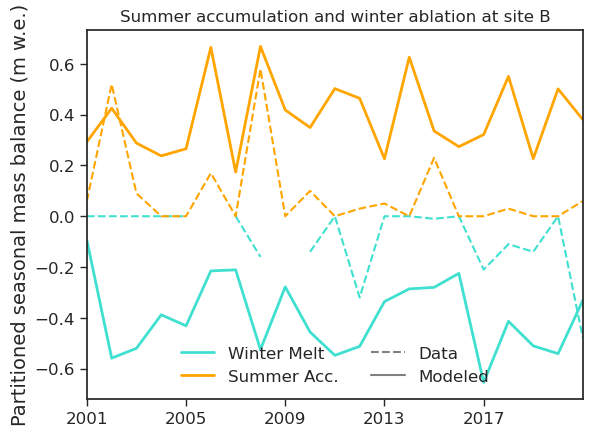

In [16]:
plot_by(ds,[startdate,'2022-04-20'],[['melt']],by='doy')
seasonal_mass_balance(data_fp,ds,'B',plot='w-s+')

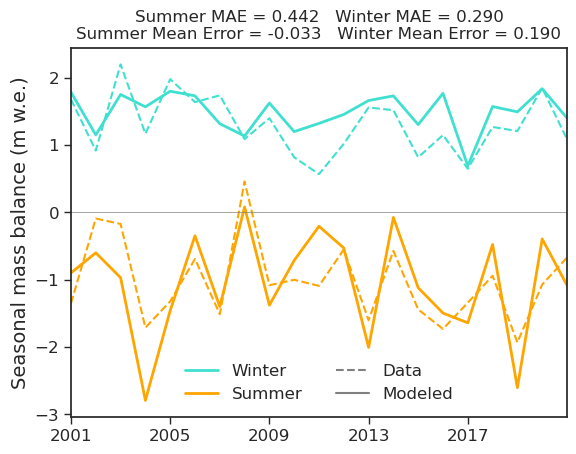

In [30]:
# ds = xr.open_dataset('/home/claire/research/Output/calibration/09_23/kw0.25_ksnowDouville_aice0.4_siteD_0.nc')
ds = xr.open_dataset('/home/claire/research/Output/calibration/10_01/kw_calibration_10_01_run39_0.nc')

# ds.melt.values *= 1000
# plot_by(ds,[startdate,'2022-04-20'],[['melt']],by='doy')
fig,ax = seasonal_mass_balance(data_fp,ds,'D',plot=True)
plt.show()